In [71]:
import pandas as pd
df=pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [72]:
df=df.drop("Serial No.",axis=1)

In [73]:
df=df.drop("University Rating",axis=1)

In [74]:
df=df.drop("Research",axis=1)

In [81]:
df.head()

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Chance
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65


In [53]:
X=df.iloc[:,[0,1,2,3,4]]
X.head()

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA
0,337,118,4.5,4.5,9.65
1,324,107,4.0,4.5,8.87
2,316,104,3.0,3.5,8.00
3,322,110,3.5,2.5,8.67
4,314,103,2.0,3.0,8.21


In [8]:
y=df.iloc[:,[5]]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)
print(X_train.shape)
print(X_test.shape)

(320, 5)
(80, 5)


# Checking Outlier 

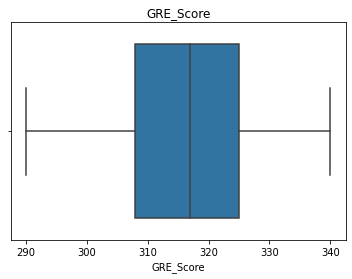

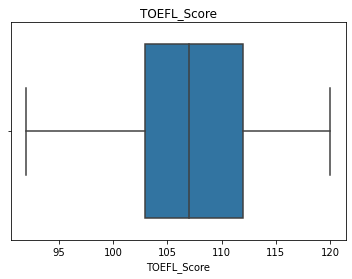

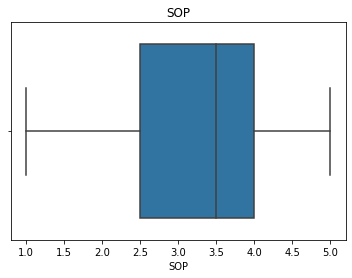

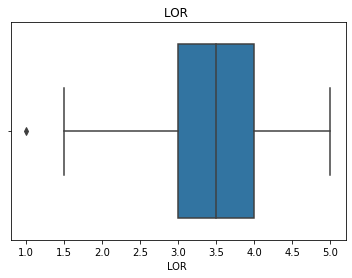

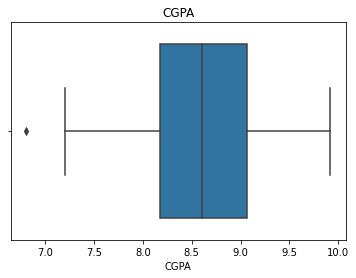

In [66]:
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns
import matplotlib.pyplot as plt
for feature in X.columns:
    sns.boxplot(X[feature])
    plt.title(feature)
    plt.show()

##### No outlier as such 

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=linear.predict(X_test)

In [15]:
import numpy as np 
from sklearn import metrics
print("R2=", metrics.r2_score(y_test,y_pred))
print("Root Mean Sq Error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2= 0.8164749290209785
Root Mean Sq Error= 0.06884209367976583


# Support Vector Regression 

In [17]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

/home/abhisek/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [18]:
y_svr_pred=svr.predict(X_test)

In [19]:
print("R2=", metrics.r2_score(y_test,y_svr_pred))
print("Root Mean Sq Error=",np.sqrt(metrics.mean_squared_error(y_test,y_svr_pred)))

R2= 0.6349228829009701
Root Mean Sq Error= 0.09709540459999744


# Decision Tree Regressor with default values

In [20]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
y_dtr_pred=dtr.predict(X_test)

In [22]:
print("R2=", metrics.r2_score(y_test,y_dtr_pred))
print("Root Mean Sq Error=",np.sqrt(metrics.mean_squared_error(y_test,y_dtr_pred)))

R2= 0.5555380756884967
Root Mean Sq Error= 0.1071330947933457


### Hypertune the parameters of Decision tree regressor with the help of Randomized Search CV 

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
dtr_rand_space={"criterion":["mse","friedman_mse","mae","poisson"],
               "splitter":["best", "random"],
               "max_depth":[int(x) for x in np.linspace(start=2,stop=30,num=15)],
               "min_samples_split":[int(x) for x in np.linspace(start=1 ,stop=100, num=10)],
               "min_samples_leaf":[int(x) for x in np.linspace(start=2, stop=10,num=5)],
               "max_features":["auto","sqrt","log2"]}
dtr_rand_space

{'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
 'min_samples_split': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100],
 'min_samples_leaf': [2, 4, 6, 8, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [42]:
dtr_model=DecisionTreeRegressor()
rand_dtr=RandomizedSearchCV(estimator=dtr_model,param_distributions=dtr_rand_space,
                           n_iter=500,cv=10,n_jobs=-1,verbose=3,random_state=42)
rand_dtr.fit(X_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 4088 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   18.4s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [1, 12, 23, 34, 45,
                                                              56, 67, 78, 89,
                                                              100],
                                        'splitter': ['best', 'random']},
           

In [44]:
rand_dtr.best_params_

{'splitter': 'best',
 'min_samples_split': 23,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'mse'}

#### Putting the parameters in decision tree regressor 

In [46]:
dtr_rand_model=DecisionTreeRegressor(splitter="best",min_samples_split=23,
                                    min_samples_leaf=10,max_features="sqrt",max_depth=8,criterion="mse")
dtr_rand_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=23)

In [47]:
y__dtr_rand_pred=dtr_rand_model.predict(X_test)

In [49]:
print("R2=", metrics.r2_score(y_test,y__dtr_rand_pred))
print("Root Mean Sq Error=",np.sqrt(metrics.mean_squared_error(y_test,y__dtr_rand_pred)))

R2= 0.7342658307069805
Root Mean Sq Error= 0.08283808877485485


# Random Forest Regressor with default parameters 

In [87]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
y_rfr_pred=rfr.predict(X_test)

In [89]:
print("R2=", metrics.r2_score(y_test,y_rfr_pred))
print("Root Mean Sq Error=",np.sqrt(metrics.mean_squared_error(y_test,y_rfr_pred)))

R2= 0.7998079161611793
Root Mean Sq Error= 0.07190015385936246


### Hypertune the parameters of Random forest regressor with the help of Randomized Search CV 

In [97]:
rfr_rand_space={"n_estimators":[int(x) for x in np.linspace(start=10,stop=200,num=20)],
               "criterion":["mse","mae"],
               "max_depth":[20,40,60,80,100,120,140,160],
               "min_samples_split":[2,4,6,8,10],
               "min_samples_leaf":[1,3,5,7,9],
               "max_features":["auto","sqrt","log2"],
               }
rfr_rand_space

{'n_estimators': [10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 'criterion': ['mse', 'mae'],
 'max_depth': [20, 40, 60, 80, 100, 120, 140, 160],
 'min_samples_split': [2, 4, 6, 8, 10],
 'min_samples_leaf': [1, 3, 5, 7, 9],
 'max_features': ['auto', 'sqrt', 'log2']}

In [117]:
rfr_model=RandomForestRegressor()
rfr_rand_model=RandomizedSearchCV(estimator=rfr_model,param_distributions=rfr_rand_space,
                                 n_iter=500,cv=10,verbose=2,n_jobs=-1,random_state=42)
rfr_rand_model.fit(X_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3309 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4078 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 4937 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 11.8min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [20, 40, 60, 80, 100, 120,
                                                      140, 160],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
          

In [118]:
rfr_rand_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': 160,
 'criterion': 'mae'}

In [119]:
rfr_hyper_model=RandomForestRegressor(n_estimators=30,min_samples_split=4,min_samples_leaf=9,
                                     max_features="sqrt",max_depth=160,criterion="mae")
rfr_hyper_model.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=160, max_features='sqrt',
                      min_samples_leaf=9, min_samples_split=4, n_estimators=30)

In [120]:
y_rfr_rand_pred=rfr_hyper_model.predict(X_test)

In [121]:
print("R2=", metrics.r2_score(y_test,y_rfr_rand_pred))
print("Root Mean Sq Error=",np.sqrt(metrics.mean_squared_error(y_test,y_rfr_rand_pred)))

R2= 0.7820198860379898
Root Mean Sq Error= 0.07502652077395329
